# 📚 Import Libraries

---

In [211]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")


---
# 📂 Load Data

---

## 🌐 Sumber Data

Dataset ini diambil dari **Kaggle** dan berisi informasi klinis pasien untuk memprediksi kanker hati.  
Dataset ini mencakup berbagai fitur medis dan gaya hidup yang berhubungan dengan risiko kanker hati.  

🔗 [Predict Liver Cancer](https://www.kaggle.com/datasets/miadul/predict-liver-cancer-from-and-clinical-features/data)

Dataset ini berisi informasi klinis dan gaya hidup pasien, termasuk umur, jenis kelamin, indeks massa tubuh (BMI), konsumsi alkohol, status merokok, infeksi hepatitis B dan C, skor fungsi hati, kadar alpha-fetoprotein (AFP), riwayat sirosis dan keluarga dengan kanker, aktivitas fisik, diabetes, serta diagnosis akhir terkait kanker hati.

In [212]:
data = pd.read_csv("synthetic_liver_cancer_dataset.csv")

data


,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,Female,18.1,Regular,Former,0,0,51.9,16.44,0,0,Low,0,0
1,81,Female,19.9,Occasional,Never,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,Female,25.5,Never,Never,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,Male,16.0,Never,Former,0,0,50.3,19.09,0,0,Low,1,0
4,72,Male,21.0,Occasional,Former,0,0,39.5,4.95,1,0,Low,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,Male,20.1,Regular,Never,0,0,68.2,6.73,1,0,Moderate,0,0
4996,80,Male,16.9,Never,Never,1,0,80.2,44.66,0,0,Low,0,0
4997,51,Female,23.1,Occasional,Never,0,0,65.7,7.64,0,1,Low,0,0
4998,76,Female,26.4,Never,Never,0,1,26.4,6.15,0,0,Low,0,0


## 🗃️ Keterangan Data

| Column Name                | Type        | Description                                                |
|-----------------------------|------------|------------------------------------------------------------|
| age                         | Numeric    | Patient's age in years (30–85)                             |
| gender                      | Categorical| Gender of the patient (Male, Female)                       |
| bmi                         | Numeric    | Body Mass Index (approx. 16–45)                             |
| alcohol_consumption         | Categorical| Alcohol use: Never, Occasional, Regular                    |
| smoking_status              | Categorical| Smoking behavior: Never, Former, Current                   |
| hepatitis_b                 | Binary     | Presence of Hepatitis B infection (0=No, 1=Yes)            |
| hepatitis_c                 | Binary     | Presence of Hepatitis C infection (0=No, 1=Yes)            |
| liver_function_score        | Numeric    | Simulated liver function score (0–100)                     |
| alpha_fetoprotein_level     | Numeric    | Alpha-fetoprotein (AFP) levels in ng/mL                    |
| cirrhosis_history           | Binary     | Past history of liver cirrhosis (0=No, 1=Yes)             |
| family_history_cancer       | Binary     | Family history of cancer (0=No, 1=Yes)                     |
| physical_activity_level     | Categorical| Low, Moderate, High                                         |
| diabetes                    | Binary     | Presence of diabetes (0=No, 1=Yes)                          |
| liver_cancer                | Target     | Final diagnosis (0=No Cancer, 1=Has Liver Cancer)          |


---
# 🔎 Data Analysis
---

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5000 non-null   int64  
 1   gender                   5000 non-null   object 
 2   bmi                      5000 non-null   float64
 3   alcohol_consumption      5000 non-null   object 
 4   smoking_status           5000 non-null   object 
 5   hepatitis_b              5000 non-null   int64  
 6   hepatitis_c              5000 non-null   int64  
 7   liver_function_score     5000 non-null   float64
 8   alpha_fetoprotein_level  5000 non-null   float64
 9   cirrhosis_history        5000 non-null   int64  
 10  family_history_cancer    5000 non-null   int64  
 11  physical_activity_level  5000 non-null   object 
 12  diabetes                 5000 non-null   int64  
 13  liver_cancer             5000 non-null   int64  
dtypes: float64(3), int64(7),

In [214]:
data.describe()

,age,bmi,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,diabetes,liver_cancer
count,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.222800,25.90464,0.15120,0.095800,65.203900,15.109424,0.301600,0.241400,0.199200,0.217800
std,15.799224,5.10520,0.35828,0.294346,14.875477,15.196809,0.458998,0.427975,0.399439,0.412792
min,30.000000,8.10000,0.00000,0.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,22.50000,0.00000,0.000000,54.800000,4.357500,0.000000,0.000000,0.000000,0.000000
50%,57.000000,25.90000,0.00000,0.000000,65.200000,10.340000,0.000000,0.000000,0.000000,0.000000
75%,71.000000,29.30000,0.00000,0.000000,75.200000,21.010000,1.000000,0.000000,0.000000,0.000000
max,84.000000,43.70000,1.00000,1.000000,115.700000,136.800000,1.000000,1.000000,1.000000,1.000000


In [215]:
data.isnull().sum()

age                        0
gender                     0
bmi                        0
alcohol_consumption        0
smoking_status             0
hepatitis_b                0
hepatitis_c                0
liver_function_score       0
alpha_fetoprotein_level    0
cirrhosis_history          0
family_history_cancer      0
physical_activity_level    0
diabetes                   0
liver_cancer               0
dtype: int64

In [216]:
data.duplicated().sum()


0

---
# 🧮 EDA (Exploratory Data Analysis)
---

In [217]:
data_vis = data.copy()

mapping = {0: "No Cancer", 1: "Liver Cancer"}
data_vis['liver_cancer_label'] = data_vis['liver_cancer'].map(mapping)


## 1️⃣ Visualization One Dimension

Bagian ini menampilkan distribusi responden berdasarkan **satu variabel** untuk memahami sebaran data.  
Visualisasi ini membantu mengenali pola umum dan proporsi kategori dalam dataset.

Visualisasi yang akan dibuat:  
- **Distribusi Responden per Gender**  
- **Distribusi Responden per Alcohol Consumption**  
- **Distribusi Responden per Smoking Status**  
- **Distribusi Responden per Physical Activity**  
- **Distribusi Responden per Liver Cancer**  

### 👤 Distribusi Responden per Gender

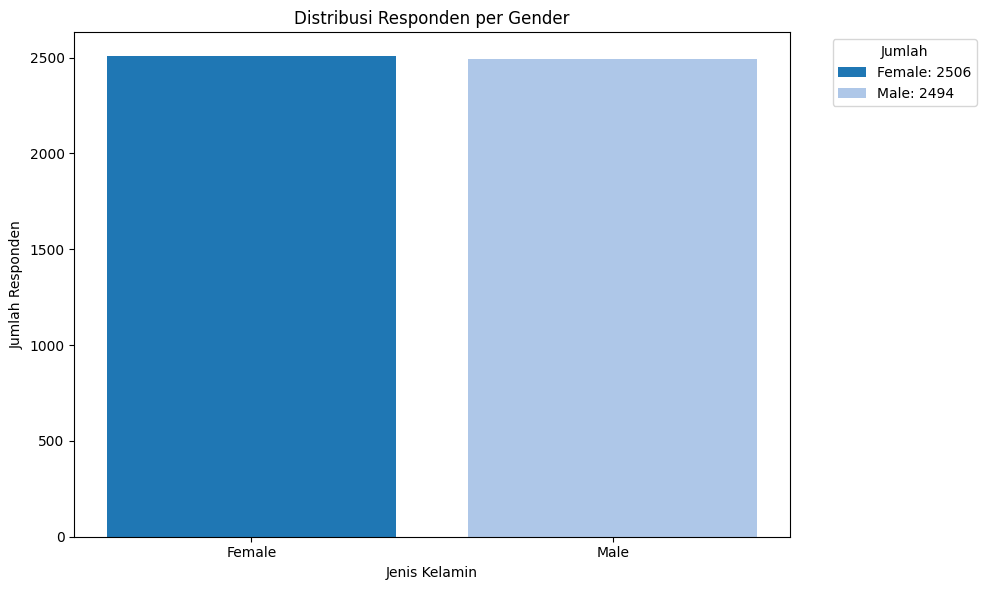

In [218]:
gender_count = data_vis['gender'].value_counts().sort_index()

gender = gender_count.index
values = gender_count.values
colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(gender, values, color=colors[:len(gender)])

ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Jenis Kelamin")
ax.set_title("Distribusi Responden per Gender")

labels = [f"{c}: {v}" for c, v in zip(gender, values)]
ax.legend(bars, labels, title="Jumlah",
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 🍷 Distribusi Responden per Alcohol Consumption

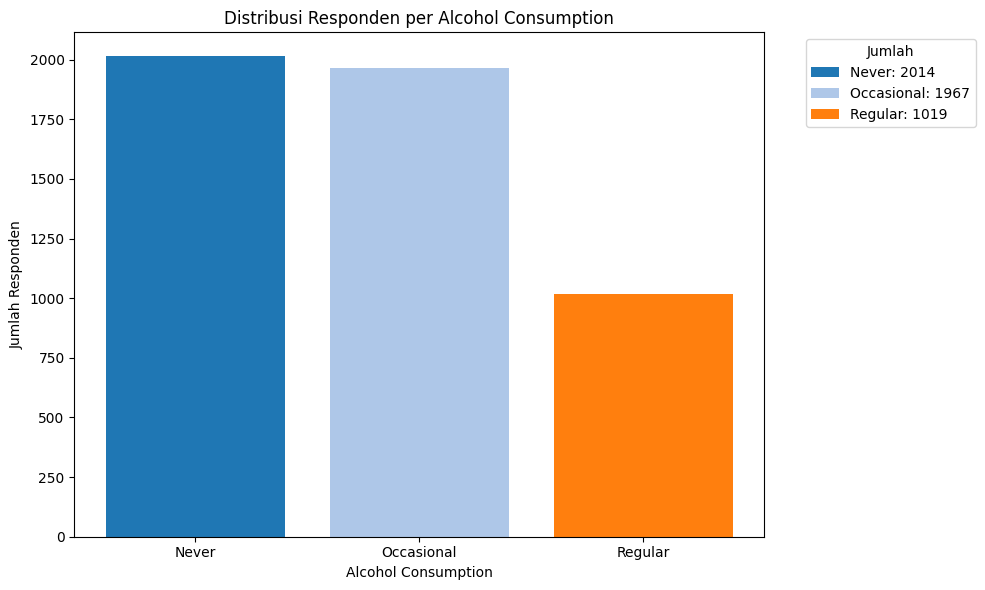

In [219]:
consumption_count = data_vis['alcohol_consumption'].value_counts().sort_index()

consumption = consumption_count.index
values = consumption_count.values
colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(consumption, values, color=colors[:len(consumption)])

ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Alcohol Consumption")
ax.set_title("Distribusi Responden per Alcohol Consumption")

labels = [f"{c}: {v}" for c, v in zip(consumption, values)]
ax.legend(bars, labels, title="Jumlah",
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 🚬 Distribusi Responden per Smoking Status

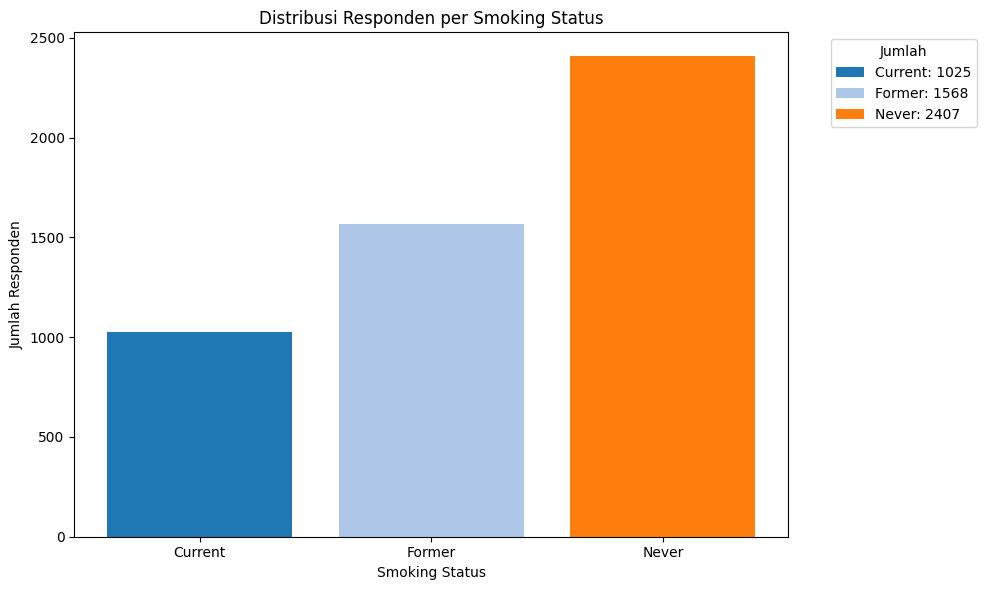

In [220]:
smoking_count = data_vis['smoking_status'].value_counts().sort_index()

smoking = smoking_count.index
values = smoking_count.values
colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(smoking, values, color=colors[:len(smoking)])

ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Smoking Status")
ax.set_title("Distribusi Responden per Smoking Status")

labels = [f"{c}: {v}" for c, v in zip(smoking, values)]
ax.legend(bars, labels, title="Jumlah",
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 🏃 Distribusi Responden per Physical Activity

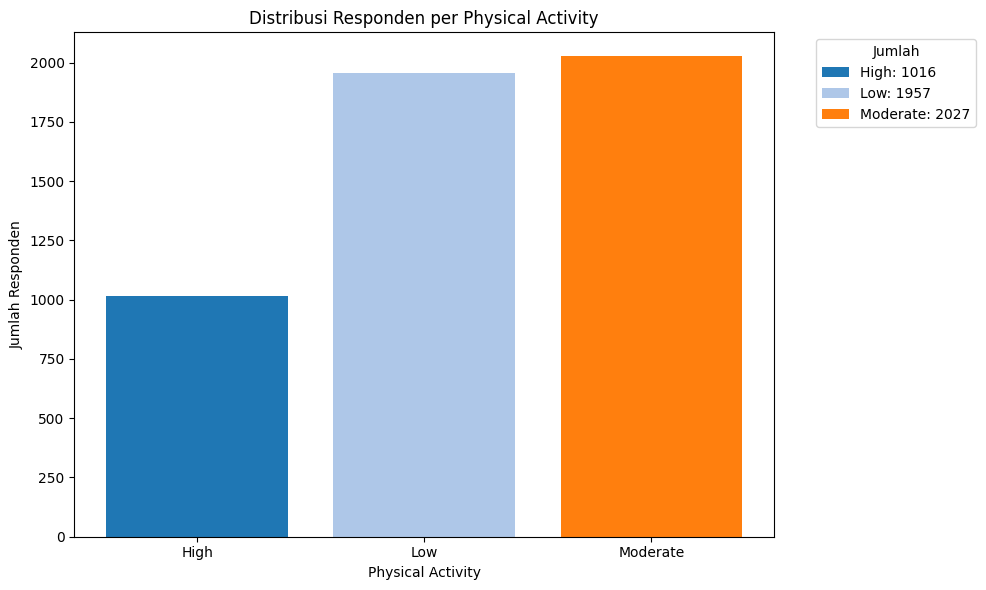

In [221]:
activity_count = data_vis['physical_activity_level'].value_counts().sort_index()

activity = activity_count.index
values = activity_count.values
colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(activity, values, color=colors[:len(activity)])

ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Physical Activity")
ax.set_title("Distribusi Responden per Physical Activity")

labels = [f"{c}: {v}" for c, v in zip(activity, values)]
ax.legend(bars, labels, title="Jumlah",
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 🧬 Distribusi Responden per Liver Cancer

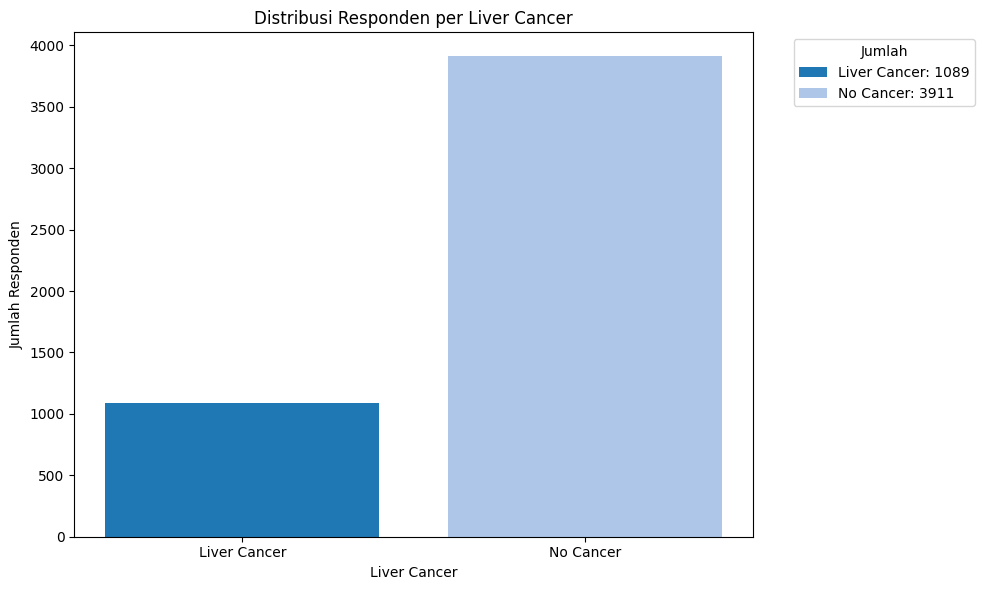

In [222]:
cancer_count = data_vis['liver_cancer_label'].value_counts().sort_index()

cancer = cancer_count.index
values = cancer_count.values
colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(cancer, values, color=colors[:len(cancer)])

ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Liver Cancer")
ax.set_title("Distribusi Responden per Liver Cancer")

labels = [f"{c}: {v}" for c, v in zip(cancer, values)]
ax.legend(bars, labels, title="Jumlah",
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## 2️⃣ Visualization Two Dimension

Bagian ini menampilkan hubungan antara **dua variabel**, khususnya melihat distribusi **Liver Cancer** terhadap faktor-faktor lain.  
Visualisasi ini berguna untuk mengenali potensi faktor risiko terhadap penyakit.

Visualisasi yang akan dibuat:  
- **Distribusi Liver Cancer per Gender**  
- **Distribusi Liver Cancer per Alcohol Consumption**  
- **Distribusi Liver Cancer per Smoking Status**  
- **Distribusi Liver Cancer per Physical Activity Level**  

### 🧑‍🤝‍🧑 Distribusi Liver Cancer per Gender

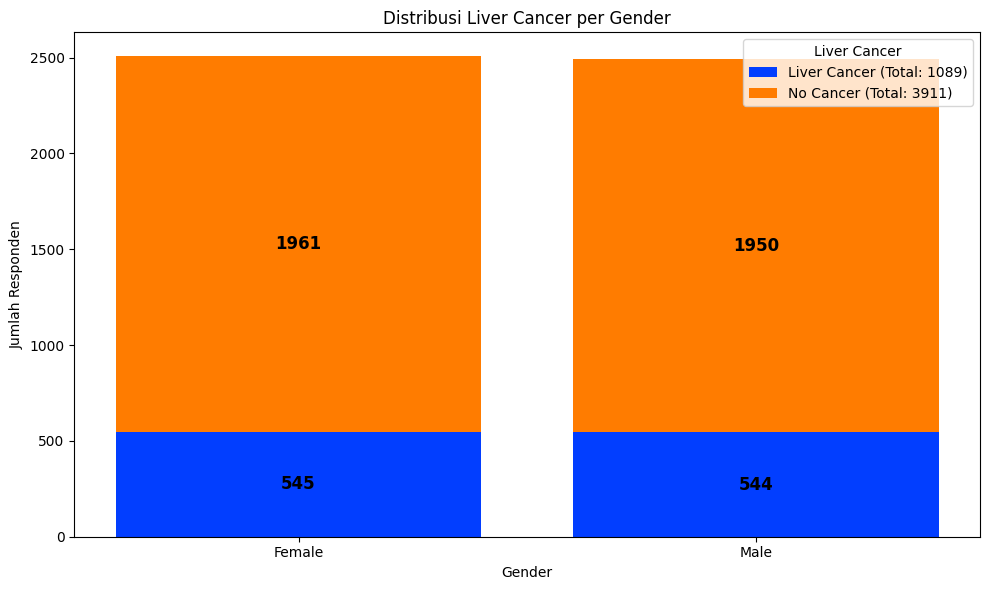

In [223]:
cancer_gender = data_vis.groupby(['gender', 'liver_cancer_label']).size().unstack(fill_value=0)
cancer_labels = cancer_gender.columns
colors = sns.color_palette("bright", n_colors=len(cancer_labels))


genders = cancer_gender.index
x = np.arange(len(genders))

fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(genders))

# Hitung total per kategori untuk legend
totals_per_category = cancer_gender.sum(axis=0)

bars = []
for i, cancer_label in enumerate(cancer_labels):
    values = cancer_gender[cancer_label].values
    bar = ax.bar(x, values, bottom=bottom, color=colors[i])
    bars.append(bar)
    bottom += values

# Tambahkan angka tiap kategori di tengah bar
bottom = np.zeros(len(genders))
for i, cancer_label in enumerate(cancer_labels):
    values = cancer_gender[cancer_label].values
    for xi, yi in zip(x, values):
        ax.text(xi, bottom[xi] + yi/2, str(yi), ha='center',
                va='center', color='black', fontsize=12, fontweight='bold')
    bottom += values

ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Gender")
ax.set_title("Distribusi Liver Cancer per Gender")
ax.set_xticks(x)
ax.set_xticklabels(genders)

legend_labels = [
    f"{label} (Total: {totals_per_category[label]})" for label in cancer_labels]
ax.legend(bars, legend_labels, title="Liver Cancer")

plt.tight_layout()
plt.show()


### 🥂 Distribusi Liver Cancer per Alcohol Consumption

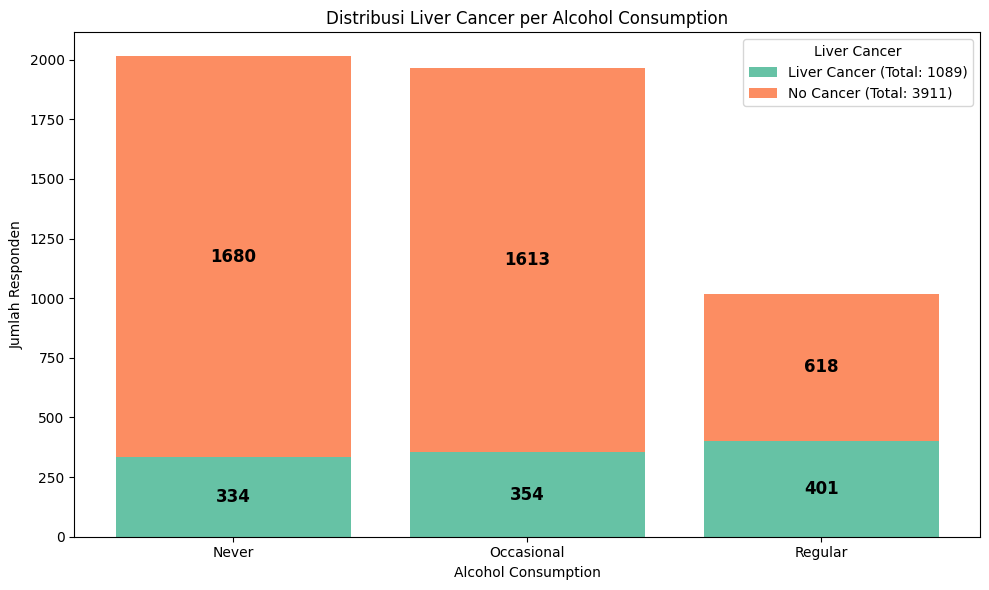

In [224]:
alcohol_grouped = data_vis.groupby(
    ['alcohol_consumption', 'liver_cancer_label']).size().unstack(fill_value=0)
lc_labels = alcohol_grouped.columns
colors = sns.color_palette("Set2", n_colors=len(lc_labels))
x = np.arange(len(alcohol_grouped.index))
bottom = np.zeros(len(alcohol_grouped.index))

fig, ax = plt.subplots(figsize=(10, 6))
bars = []

for i, lc in enumerate(lc_labels):
    values = alcohol_grouped[lc].values
    bar = ax.bar(x, values, bottom=bottom, color=colors[i])
    bars.append(bar)
    bottom += values

# Tambahkan angka di tengah bar
bottom = np.zeros(len(alcohol_grouped.index))
for i, lc in enumerate(lc_labels):
    values = alcohol_grouped[lc].values
    for xi, yi in zip(x, values):
        ax.text(xi, bottom[xi]+yi/2, str(yi), ha='center',
                va='center', color='black', fontsize=12, fontweight='bold')
    bottom += values

ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Alcohol Consumption")
ax.set_title("Distribusi Liver Cancer per Alcohol Consumption")
ax.set_xticks(x)
ax.set_xticklabels(alcohol_grouped.index)
legend_labels = [
    f"{lc} (Total: {data_vis[data_vis['liver_cancer_label']==lc].shape[0]})" for lc in lc_labels]
ax.legend(bars, legend_labels, title="Liver Cancer")
plt.tight_layout()
plt.show()


### 💨 Distribusi Liver Cancer per Smoking Status

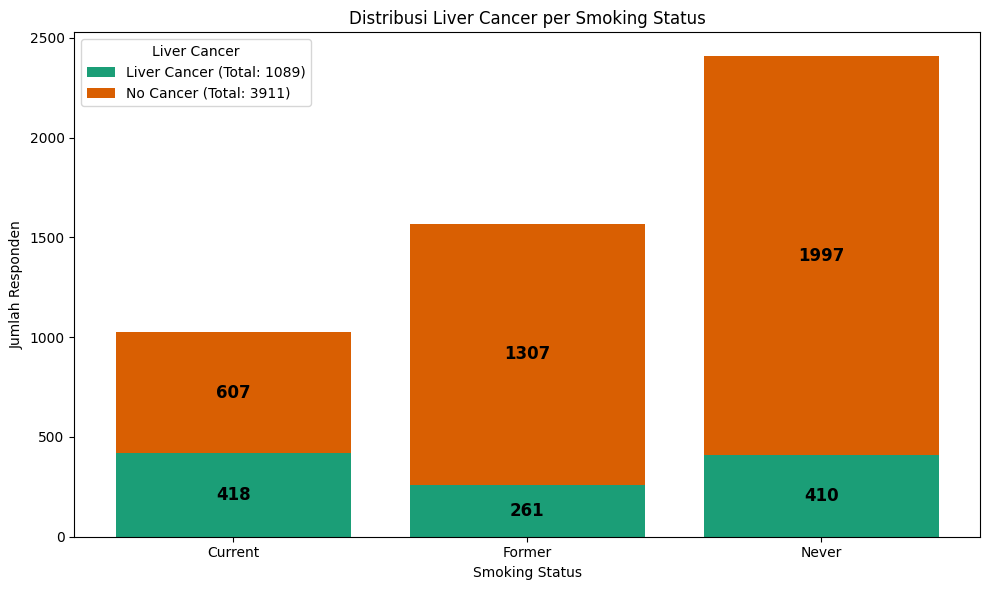

In [225]:
smoking_grouped = data_vis.groupby(
    ['smoking_status', 'liver_cancer_label']).size().unstack(fill_value=0)
lc_labels = smoking_grouped.columns
colors = sns.color_palette("Dark2", n_colors=len(lc_labels))
x = np.arange(len(smoking_grouped.index))
bottom = np.zeros(len(smoking_grouped.index))

fig, ax = plt.subplots(figsize=(10, 6))
bars = []

for i, lc in enumerate(lc_labels):
    values = smoking_grouped[lc].values
    bar = ax.bar(x, values, bottom=bottom, color=colors[i])
    bars.append(bar)
    bottom += values

bottom = np.zeros(len(smoking_grouped.index))
for i, lc in enumerate(lc_labels):
    values = smoking_grouped[lc].values
    for xi, yi in zip(x, values):
        ax.text(xi, bottom[xi]+yi/2, str(yi), ha='center',
                va='center', color='black', fontsize=12, fontweight='bold')
    bottom += values

ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Smoking Status")
ax.set_title("Distribusi Liver Cancer per Smoking Status")
ax.set_xticks(x)
ax.set_xticklabels(smoking_grouped.index)
legend_labels = [
    f"{lc} (Total: {data_vis[data_vis['liver_cancer_label']==lc].shape[0]})" for lc in lc_labels]
ax.legend(bars, legend_labels, title="Liver Cancer")
plt.tight_layout()
plt.show()


### 🏋️ Distribusi Liver Cancer per Physical Activity Level

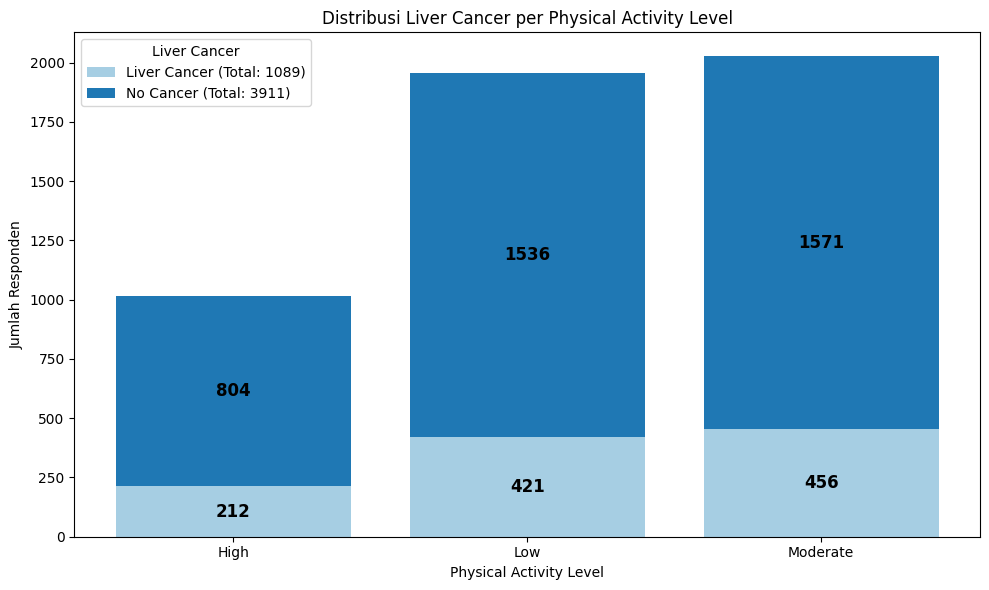

In [226]:
activity_grouped = data_vis.groupby(
    ['physical_activity_level', 'liver_cancer_label']).size().unstack(fill_value=0)
lc_labels = activity_grouped.columns
colors = sns.color_palette("Paired", n_colors=len(lc_labels))
x = np.arange(len(activity_grouped.index))
bottom = np.zeros(len(activity_grouped.index))

fig, ax = plt.subplots(figsize=(10, 6))
bars = []

for i, lc in enumerate(lc_labels):
    values = activity_grouped[lc].values
    bar = ax.bar(x, values, bottom=bottom, color=colors[i])
    bars.append(bar)
    bottom += values

bottom = np.zeros(len(activity_grouped.index))
for i, lc in enumerate(lc_labels):
    values = activity_grouped[lc].values
    for xi, yi in zip(x, values):
        ax.text(xi, bottom[xi]+yi/2, str(yi), ha='center',
                va='center', color='black', fontsize=12, fontweight='bold')
    bottom += values

ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Physical Activity Level")
ax.set_title("Distribusi Liver Cancer per Physical Activity Level")
ax.set_xticks(x)
ax.set_xticklabels(activity_grouped.index)
legend_labels = [
    f"{lc} (Total: {data_vis[data_vis['liver_cancer_label']==lc].shape[0]})" for lc in lc_labels]
ax.legend(bars, legend_labels, title="Liver Cancer")
plt.tight_layout()
plt.show()


---

# 🧹 Data Preprocessing

---

## 🔢 Encoding

Bagian ini melakukan **encoding** pada variabel kategorikal agar dapat digunakan dalam analisis statistik atau pemodelan machine learning.  
Encoding mengubah kategori menjadi format numerik yang dapat dipahami algoritma.

In [227]:
encoder = LabelEncoder()

data_res = data.copy()

### 🧑‍🦱 Gender

In [228]:
data_res['gender'].value_counts()

data_res['gender'] = encoder.fit_transform(data_res['gender'].values.reshape(-1, 1))

data_res


,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,0,18.1,Regular,Former,0,0,51.9,16.44,0,0,Low,0,0
1,81,0,19.9,Occasional,Never,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,0,25.5,Never,Never,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,1,16.0,Never,Former,0,0,50.3,19.09,0,0,Low,1,0
4,72,1,21.0,Occasional,Former,0,0,39.5,4.95,1,0,Low,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,1,20.1,Regular,Never,0,0,68.2,6.73,1,0,Moderate,0,0
4996,80,1,16.9,Never,Never,1,0,80.2,44.66,0,0,Low,0,0
4997,51,0,23.1,Occasional,Never,0,0,65.7,7.64,0,1,Low,0,0
4998,76,0,26.4,Never,Never,0,1,26.4,6.15,0,0,Low,0,0


### 🍹 Alcohol Consumption

In [229]:
data_res['alcohol_consumption'].value_counts()

data_res['alcohol_consumption'] = encoder.fit_transform(data_res['alcohol_consumption'].values.reshape(-1, 1))

data_res


,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,0,18.1,2,Former,0,0,51.9,16.44,0,0,Low,0,0
1,81,0,19.9,1,Never,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,0,25.5,0,Never,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,1,16.0,0,Former,0,0,50.3,19.09,0,0,Low,1,0
4,72,1,21.0,1,Former,0,0,39.5,4.95,1,0,Low,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,1,20.1,2,Never,0,0,68.2,6.73,1,0,Moderate,0,0
4996,80,1,16.9,0,Never,1,0,80.2,44.66,0,0,Low,0,0
4997,51,0,23.1,1,Never,0,0,65.7,7.64,0,1,Low,0,0
4998,76,0,26.4,0,Never,0,1,26.4,6.15,0,0,Low,0,0


### 🪄 Smoking Status

In [230]:
data_res['smoking_status'].value_counts()

data_res['smoking_status'] = encoder.fit_transform(data_res['smoking_status'].values.reshape(-1, 1))

data_res


,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,0,18.1,2,1,0,0,51.9,16.44,0,0,Low,0,0
1,81,0,19.9,1,2,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,0,25.5,0,2,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,1,16.0,0,1,0,0,50.3,19.09,0,0,Low,1,0
4,72,1,21.0,1,1,0,0,39.5,4.95,1,0,Low,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,1,20.1,2,2,0,0,68.2,6.73,1,0,Moderate,0,0
4996,80,1,16.9,0,2,1,0,80.2,44.66,0,0,Low,0,0
4997,51,0,23.1,1,2,0,0,65.7,7.64,0,1,Low,0,0
4998,76,0,26.4,0,2,0,1,26.4,6.15,0,0,Low,0,0


### 🤸 Physical Activity Level

In [231]:
data_res['physical_activity_level'].value_counts()

data_res['physical_activity_level'] = encoder.fit_transform(data_res['physical_activity_level'].values.reshape(-1, 1))

data_res

,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,0,18.1,2,1,0,0,51.9,16.44,0,0,1,0,0
1,81,0,19.9,1,2,0,0,41.6,8.09,0,0,2,1,0
2,58,0,25.5,0,2,0,0,76.0,0.64,0,0,2,0,0
3,44,1,16.0,0,1,0,0,50.3,19.09,0,0,1,1,0
4,72,1,21.0,1,1,0,0,39.5,4.95,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,1,20.1,2,2,0,0,68.2,6.73,1,0,2,0,0
4996,80,1,16.9,0,2,1,0,80.2,44.66,0,0,1,0,0
4997,51,0,23.1,1,2,0,0,65.7,7.64,0,1,1,0,0
4998,76,0,26.4,0,2,0,1,26.4,6.15,0,0,1,0,0


---

# ⛏️ Data Mining

---

## 🟢 Oversampling

Bagian ini menangani **imbalance dataset**, khususnya ketika jumlah pasien dengan dan tanpa kanker hati tidak seimbang.  
Oversampling membantu model belajar lebih baik pada kelas minoritas.

In [232]:
data_majority = data_res[data_res.liver_cancer == 0]
data_minority = data_res[data_res.liver_cancer == 1]

# Oversampled
data_minority_up = resample(
    data_minority,
    replace=True,    
    n_samples=len(data_majority),
    random_state=42
)

# Combine
data_balanced = pd.concat([data_majority, data_minority_up])

print("Distribusi kelas setelah oversamling:")
print(data_balanced.liver_cancer.value_counts())


Distribusi kelas setelah oversamling:
0    3911
1    3911
Name: liver_cancer, dtype: int64


## 📌 Feature and Label

Bagian ini menentukan **fitur (X)** dan **target/label (y)** dari dataset untuk pemodelan.  
Fitur mencakup semua variabel input, sedangkan label adalah kolom **liver_cancer**.

In [233]:
feature = data_balanced.drop("liver_cancer", axis=1)
label = data_balanced["liver_cancer"]


## ⚖️ Standardization and Splitting Data

Bagian ini melakukan **standarisasi fitur numerik** agar memiliki skala yang sama dan **split data** menjadi data latih dan data uji.  
Proses ini penting agar model machine learning bekerja lebih optimal dan evaluasi lebih akurat.

---

In [234]:
scaler = StandardScaler()

feature_scaled = scaler.fit_transform(feature)

X_train , X_test , y_train , y_test = train_test_split(feature_scaled,label,test_size=0.2,random_state=42)

---

# 🏗️ Model Implementation

---

In [235]:
class_names = ["No Cancer", "Liver Cancer"]

## 🌳 Random Forest

Random Forest adalah algoritma ensemble berbasis pohon keputusan yang bekerja dengan membangun banyak pohon dan melakukan voting untuk prediksi akhir.  
Cocok untuk menangani dataset dengan fitur numerik dan kategorikal.

🌳 Random Forest
✅ Accuracy: 98.66%

📊 Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.99      0.98      0.99       779
      Cancer       0.98      0.99      0.99       786

    accuracy                           0.99      1565
   macro avg       0.99      0.99      0.99      1565
weighted avg       0.99      0.99      0.99      1565



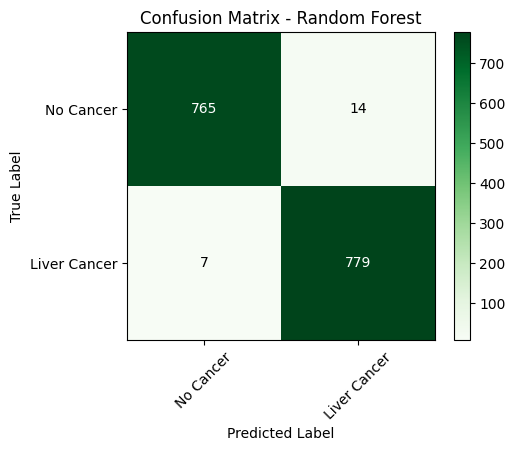

In [236]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)


acc = accuracy_score(y_test, y_pred_rf) * 100
print("🌳 Random Forest")
print(f"✅ Accuracy: {acc:.2f}%")
print("\n📊 Classification Report:\n",
      classification_report(y_test, y_pred_rf, target_names=["No Cancer", "Cancer"]))

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
plt.imshow(cm_rf, cmap="Greens")
plt.colorbar()
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

threshold = cm_rf.max() / 2
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        color = "white" if cm_rf[i, j] > threshold else "black"
        plt.text(j, i, cm_rf[i, j], ha="center", va="center",
                 color=color, fontsize=10)

plt.show()


## 🧩 Support Vector Machine (SVM)

SVM adalah algoritma yang mencari **hyperplane** terbaik untuk memisahkan kelas.  
Efektif untuk dataset dengan margin pemisahan yang jelas dan bisa menggunakan kernel untuk data non-linear.


🧩 Support Vector Machine (SVM)
✅ Accuracy: 88.37%

📊 Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.89      0.88      0.88       779
      Cancer       0.88      0.89      0.89       786

    accuracy                           0.88      1565
   macro avg       0.88      0.88      0.88      1565
weighted avg       0.88      0.88      0.88      1565



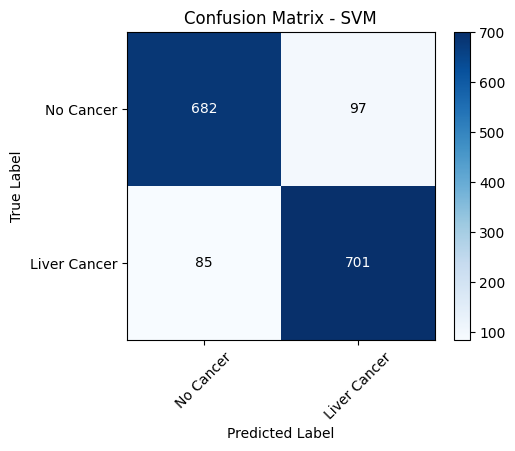

In [237]:
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred_svm) * 100
print("🧩 Support Vector Machine (SVM)")
print(f"✅ Accuracy: {acc:.2f}%")
print("\n📊 Classification Report:\n",
      classification_report(y_test, y_pred_svm, target_names=["No Cancer", "Cancer"]))

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5, 4))
plt.imshow(cm_svm, cmap="Blues")
plt.colorbar()
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

threshold = cm_svm.max() / 2
for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        color = "white" if cm_svm[i, j] > threshold else "black"
        plt.text(j, i, cm_svm[i, j], ha="center",
                 va="center", color=color, fontsize=10)

plt.show()


## 👥 K-Nearest Neighbors (KNN)

KNN adalah algoritma berbasis instance yang memprediksi kelas berdasarkan **tetangga terdekat** di data latih.  
Mudah dipahami dan digunakan untuk dataset dengan distribusi sederhana.


👥 K-Nearest Neighbors (KNN)
✅ Accuracy: 89.20%

📊 Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.90      0.88      0.89       779
      Cancer       0.88      0.91      0.89       786

    accuracy                           0.89      1565
   macro avg       0.89      0.89      0.89      1565
weighted avg       0.89      0.89      0.89      1565



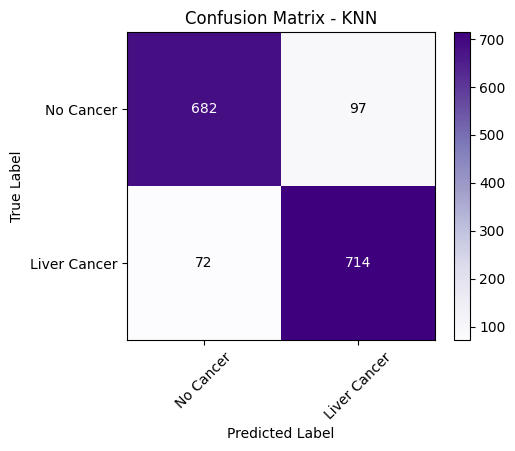

In [238]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred_knn) * 100
print("👥 K-Nearest Neighbors (KNN)")
print(f"✅ Accuracy: {acc:.2f}%")
print("\n📊 Classification Report:\n",
      classification_report(y_test, y_pred_knn, target_names=["No Cancer", "Cancer"]))

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5, 4))
plt.imshow(cm_knn, cmap="Purples")
plt.colorbar()
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

threshold = cm_knn.max() / 2
for i in range(cm_knn.shape[0]):
    for j in range(cm_knn.shape[1]):
        color = "white" if cm_knn[i, j] > threshold else "black"
        plt.text(j, i, cm_knn[i, j], ha="center",
                 va="center", color=color, fontsize=10)

plt.show()


## 📐 Naive Bayes

Naive Bayes adalah algoritma probabilistik yang menggunakan **Teorema Bayes** dengan asumsi independensi antar fitur.  
Cepat dan efektif untuk dataset dengan fitur kategorikal maupun numerik.

📐 Naive Bayes
✅ Accuracy: 83.39%

📊 Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.84      0.82      0.83       779
      Cancer       0.82      0.85      0.84       786

    accuracy                           0.83      1565
   macro avg       0.83      0.83      0.83      1565
weighted avg       0.83      0.83      0.83      1565



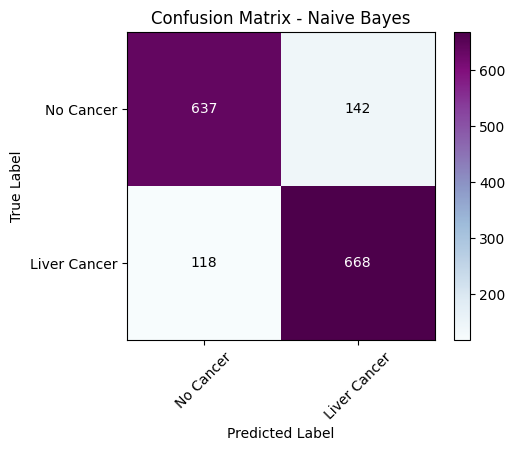

In [239]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred_nb) * 100
print("📐 Naive Bayes")
print(f"✅ Accuracy: {acc:.2f}%")
print("\n📊 Classification Report:\n",
      classification_report(y_test, y_pred_nb, target_names=["No Cancer", "Cancer"]))

cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(5, 4))
plt.imshow(cm_nb, cmap="BuPu")
plt.colorbar()
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

threshold = cm_nb.max() / 2
for i in range(cm_nb.shape[0]):
    for j in range(cm_nb.shape[1]):
        color = "white" if cm_nb[i, j] > threshold else "black"
        plt.text(j, i, cm_nb[i, j], ha="center",
                 va="center", color=color, fontsize=10)

plt.show()


## 🌲 Decision Tree

Decision Tree membagi data secara bertingkat berdasarkan fitur yang paling informatif untuk memprediksi kelas target.  
Hasilnya mudah divisualisasikan dan diinterpretasikan.

🌲 Decision Tree
✅ Accuracy: 96.10%

📊 Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.98      0.94      0.96       779
      Cancer       0.94      0.98      0.96       786

    accuracy                           0.96      1565
   macro avg       0.96      0.96      0.96      1565
weighted avg       0.96      0.96      0.96      1565



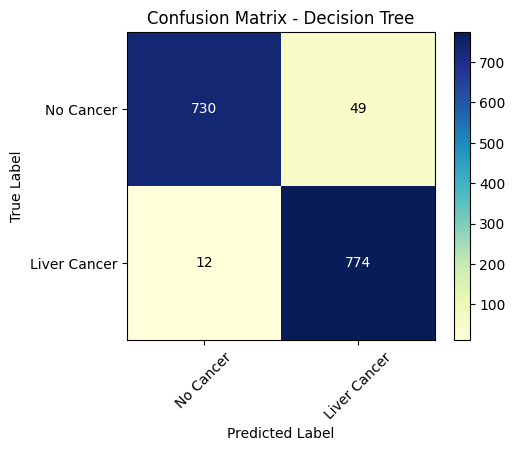

In [240]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred_dt) * 100
print("🌲 Decision Tree")
print(f"✅ Accuracy: {acc:.2f}%")
print("\n📊 Classification Report:\n",
      classification_report(y_test, y_pred_dt, target_names=["No Cancer", "Cancer"]))

cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5, 4))
plt.imshow(cm_dt, cmap="YlGnBu")
plt.colorbar()
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

threshold = cm_dt.max() / 2
for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
        color = "white" if cm_dt[i, j] > threshold else "black"
        plt.text(j, i, cm_dt[i, j], ha="center",
                 va="center", color=color, fontsize=10)

plt.show()


---
# 📝 Conclusion
---

## 📈 Hasil Prediksi

Berikut tabel ringkasan performa masing-masing model:

| Model                       | Accuracy  | Precision | Recall  | F1-Score |
|------------------------------|----------|-----------|---------|----------|
| 🌳 Random Forest             | **98.66%** | **0.99** | **0.99** | **0.99** |
| 🧩 Support Vector Machine    | 88.37%   | 0.88      | 0.88    | 0.88     |
| 👥 K-Nearest Neighbors (KNN) | 89.20%   | 0.89      | 0.89    | 0.89     |
| 📐 Naive Bayes               | 83.39%   | 0.83      | 0.83    | 0.83     |
| 🌲 Decision Tree             | 96.10%   | 0.96      | 0.96    | 0.96     |


## 🏆 Pemilihan Model Terbaik

Berdasarkan hasil accuracy dan classification report:  

- **Random Forest** memiliki **accuracy tertinggi (98.66%)**, serta nilai precision, recall, dan f1-score yang seimbang untuk kedua kelas (No Cancer dan Cancer).  
- Decision Tree juga cukup baik (96.10%), namun Random Forest lebih stabil karena merupakan algoritma ensemble yang mengurangi risiko overfitting.  
- SVM, KNN, dan Naive Bayes memiliki performa lebih rendah dibanding Random Forest, sehingga kurang optimal untuk prediksi kanker hati pada dataset ini.

**Kesimpulan:**  
✅ **Random Forest** adalah model terbaik untuk prediksi kanker hati pada dataset ini, karena memberikan performa tinggi dan stabil pada semua metrik evaluasi.

---